In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import binom

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [3]:
import sys, IPython, scipy, matplotlib, platform
print("""This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nArviZ {}\nNumPy {}\nSciPy {}\nMatplotlib {}\n""".format(sys.version[:5], IPython.__version__, pm.__version__, az.__version__, np.__version__, scipy.__version__, matplotlib.__version__))

This notebook was created using:
Python 3.7.4
IPython 7.13.0
PyMC3 3.8
ArviZ 0.7.0
NumPy 1.18.2
SciPy 1.4.1
Matplotlib 3.2.1



### Code 3.1

In [4]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
Pr_Positive = Pr_Positive_Vampire*Pr_Vampire+Pr_Positive_Mortal*(1-Pr_Vampire)
Pr_Vampire_Positive = Pr_Positive_Vampire*Pr_Vampire/Pr_Positive
print(Pr_Vampire_Positive)

0.08683729433272395


### Code 3.2

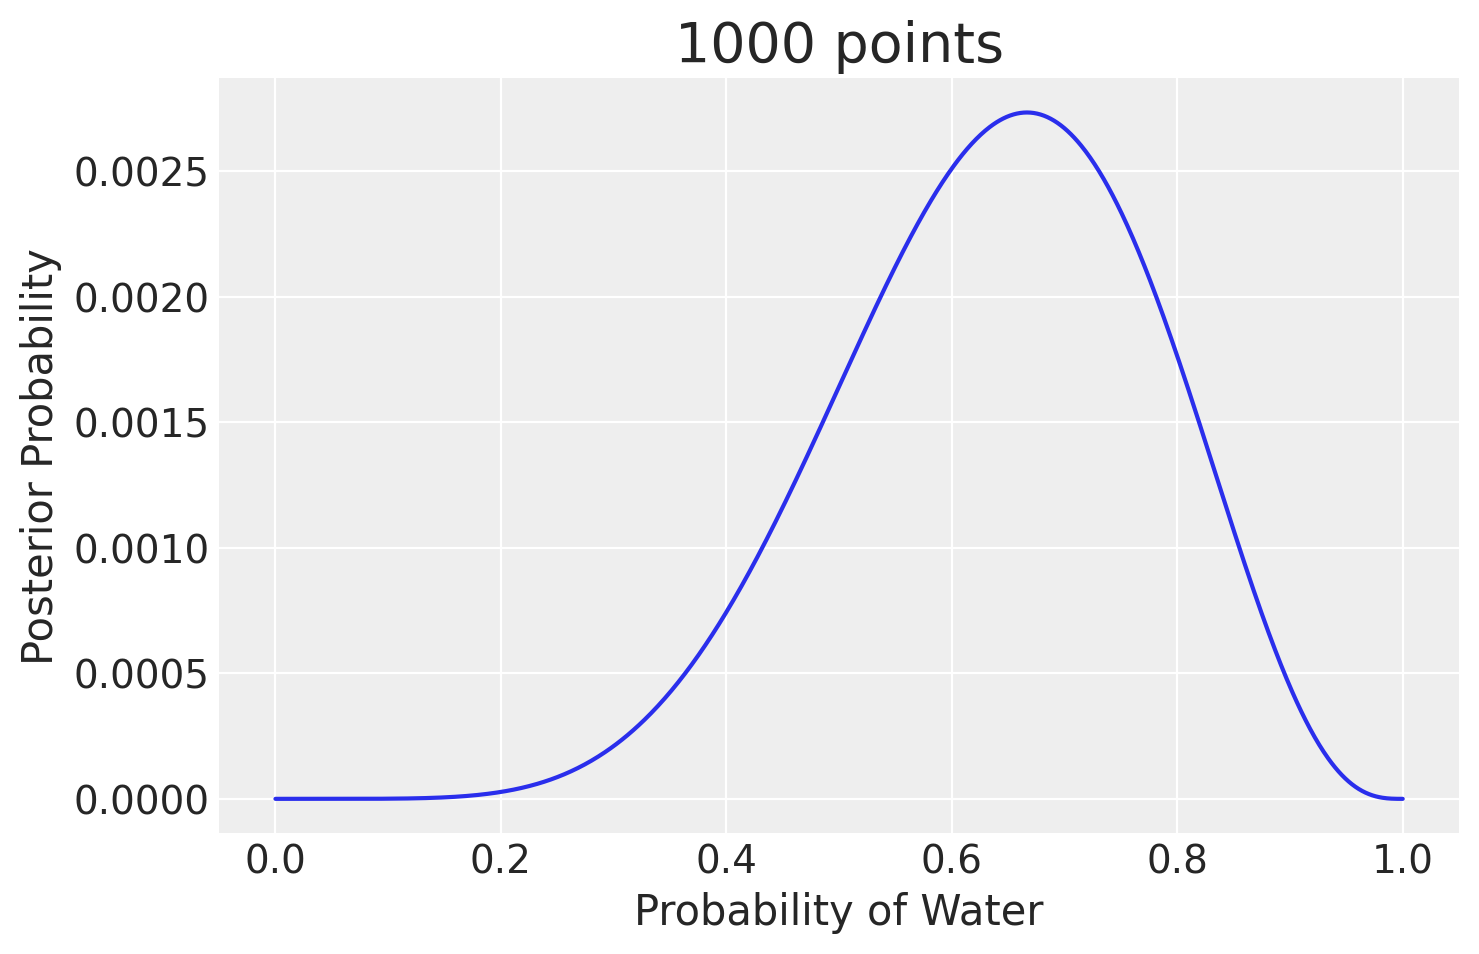

In [5]:
# define gird size
N = 1000
# define grid
p_grid = np.linspace(0, 1, N)
# define prior
prob_p = np.ones(N)
# compute likelihood at each value in grid
prob_data = binom.pmf(6, 9, p_grid)
# compute product of likelihood and prior
posterior = prob_data*prob_p
# standardize the posterior, so it sums to 1
posterior = posterior/sum(posterior)

# plot figure
fig = plt.figure(figsize=(8, 5))
plt.plot(p_grid, posterior, '-')
plt.xlabel('Probability of Water', fontsize=15)
plt.ylabel('Posterior Probability', fontsize=15)
plt.title('{} points'.format(N), fontsize=20)
plt.show()

### Code 3.3

In [6]:
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

### Code 3.4

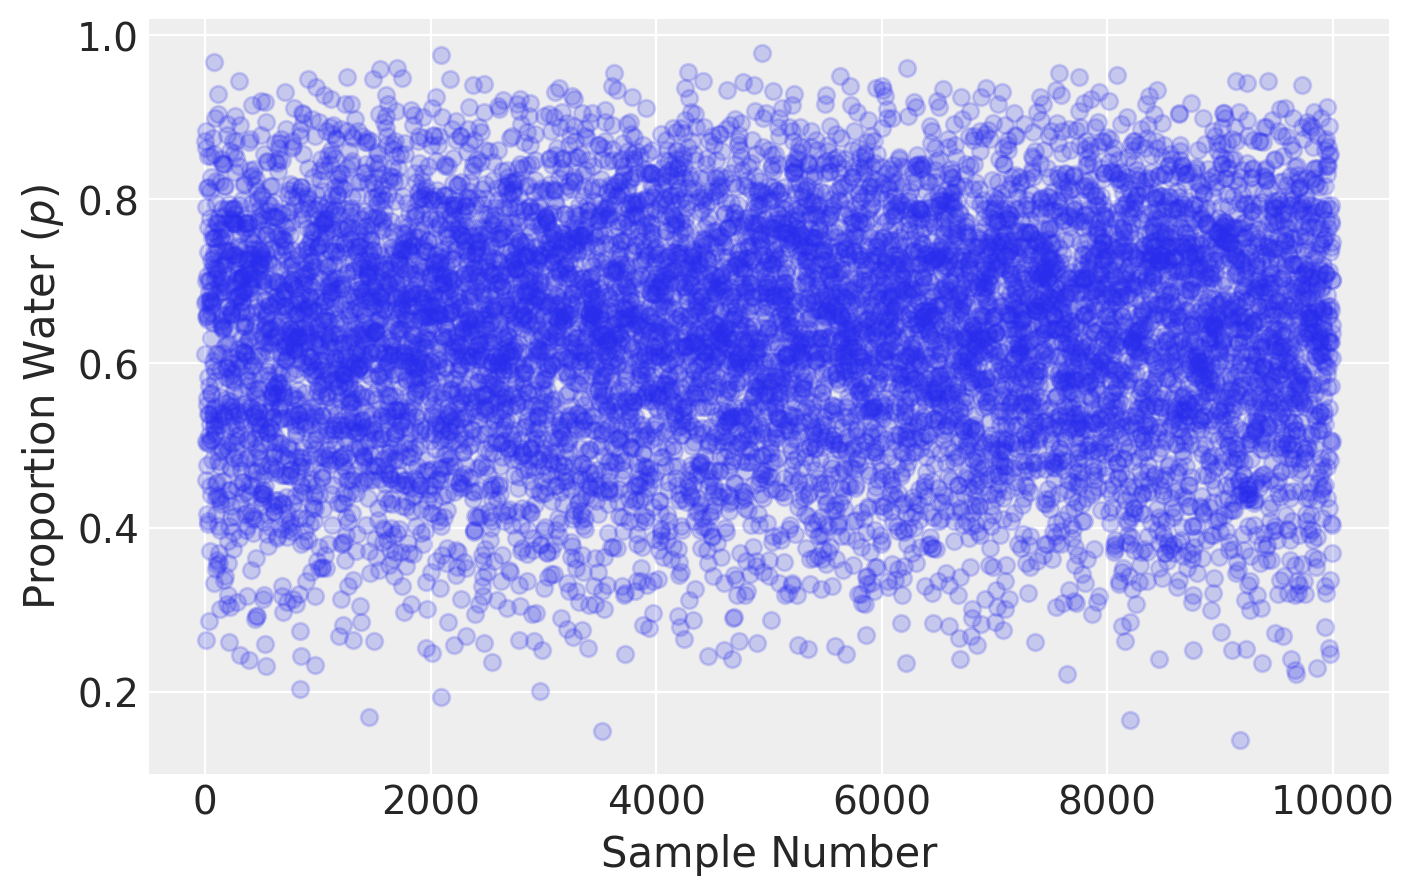

In [7]:
# plot figure
fig = plt.figure(figsize=(8, 5))
plt.plot(samples, 'o', alpha=0.2)
plt.xlabel('Sample Number', fontsize=15)
plt.ylabel('Proportion Water ($p$)', fontsize=15)
plt.show()

### Code 3.5

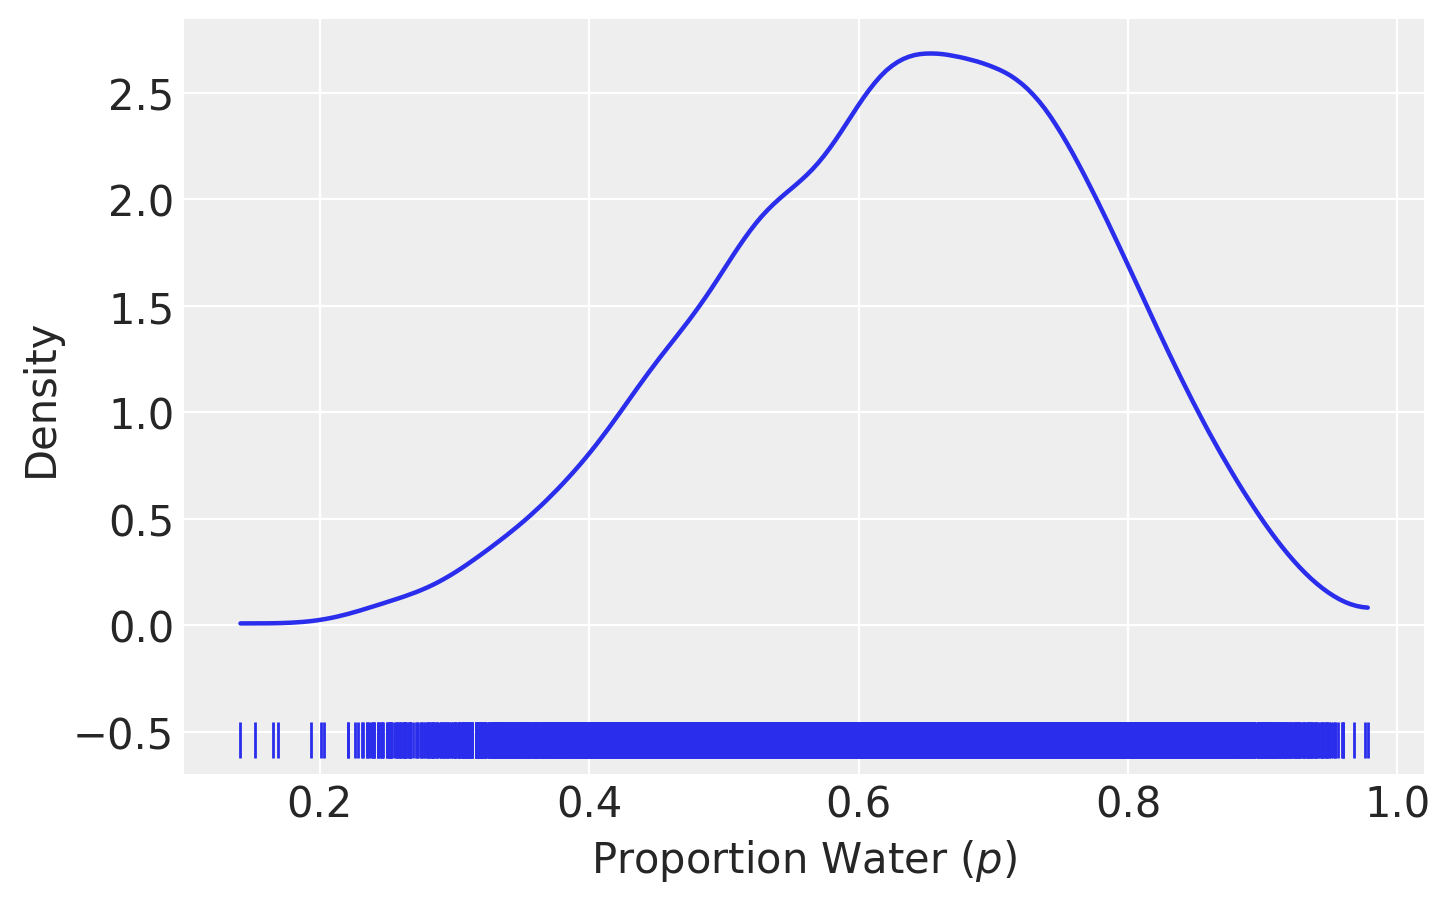

In [8]:
# plot figure
fig = plt.figure(figsize=(8, 5))
az.plot_kde(samples, rug=True)
plt.xlabel('Proportion Water ($p$)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

### Code 3.6

In [9]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid<0.5])

0.17187458902022879

### Code 3.7

In [10]:
sum(samples<0.5)/len(samples)

0.1793

### Code 3.8

In [11]:
sum((samples>0.5)&(samples<0.75))/len(samples)

0.6055

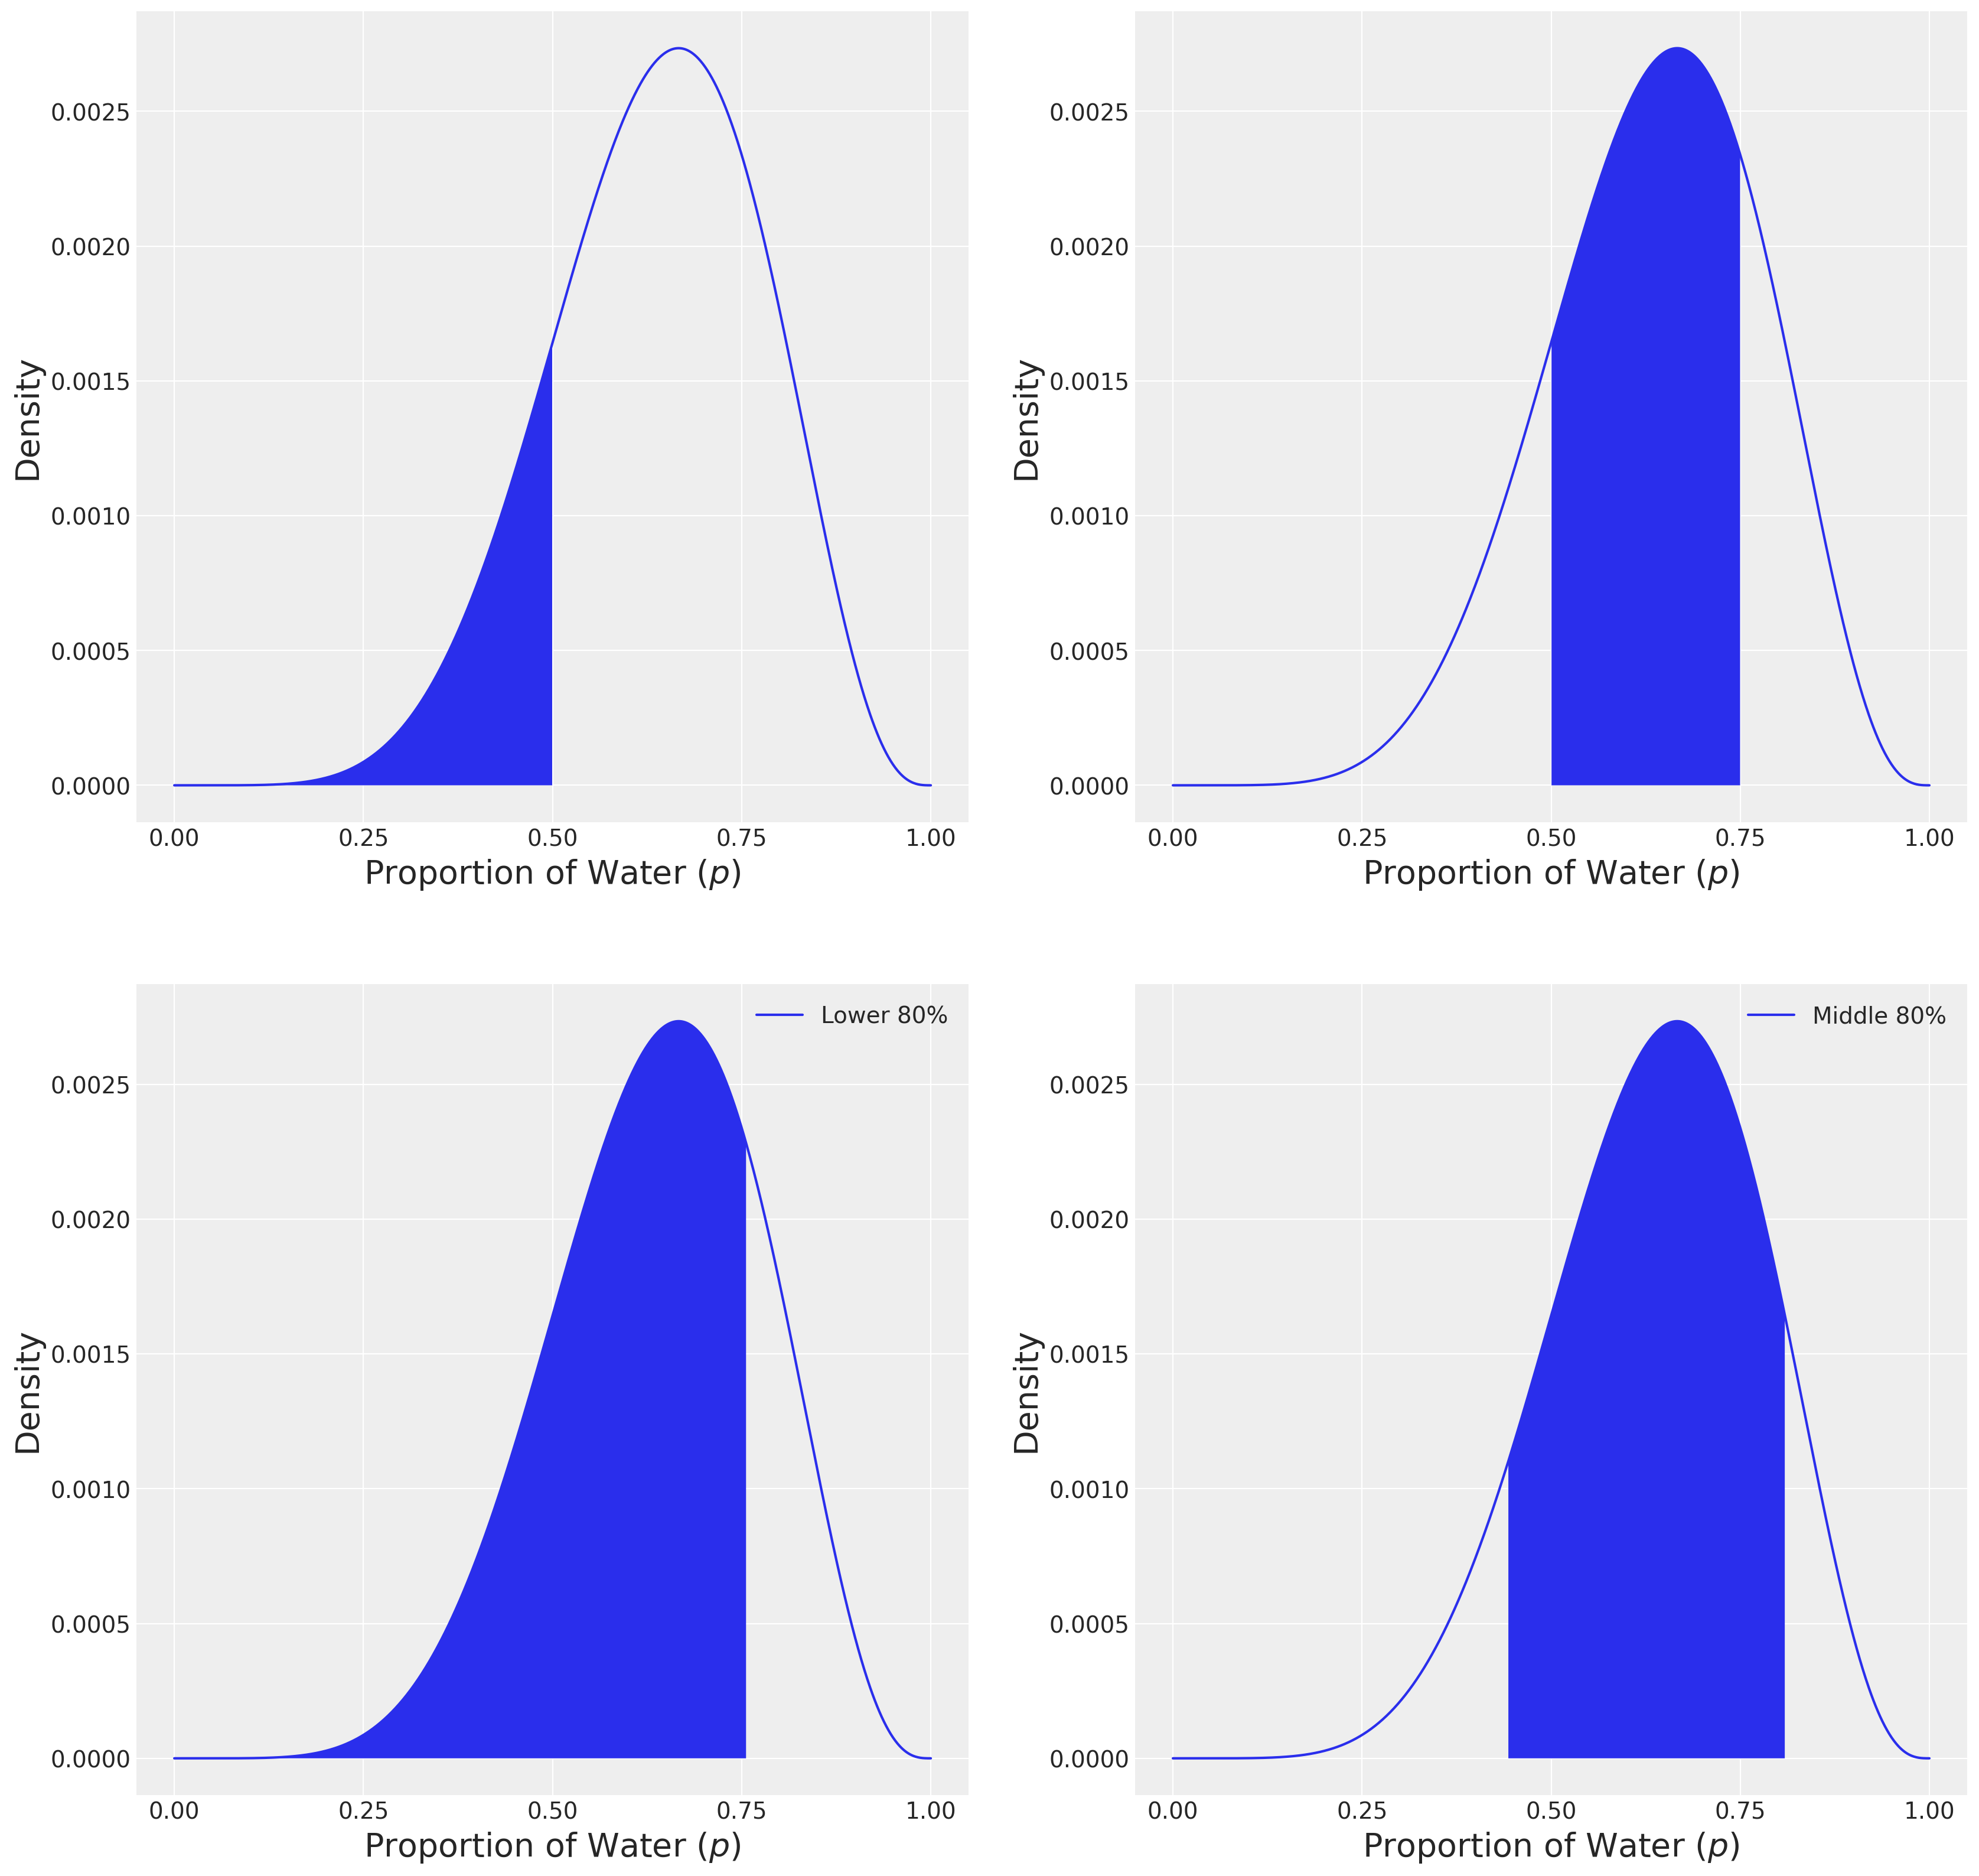

In [12]:
# plotting out intervals of defined boundaries: 
plt.figure(figsize=(20,20)) 

# Intervals of defined boundaries

# plot p < 0.5
plt.subplot(2, 2, 1)
plt.plot(p_grid, posterior)
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where=p_grid<0.5)

# plot p > 0.5 & p < 0.75
plt.subplot(2, 2, 2)
plt.plot(p_grid, posterior)
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where=(p_grid>0.5)&(p_grid<0.75))

# Intervals of defined mass

# plot p < 0.5
plt.subplot(2, 2, 3)
plt.plot(p_grid, posterior, label = "Lower 80%")
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where = p_grid < np.percentile(samples, 80))
plt.legend(loc=0)

# plot p > 0.1 & p < 0.90
perc_range = np.percentile(samples, [10, 90])
plt.subplot(2, 2, 4)
plt.plot(p_grid, posterior, label = "Middle 80%")
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where = (p_grid > perc_range[0])&(p_grid < perc_range[1]))
plt.legend(loc=0)
plt.show()

### Code 3.9

In [13]:
np.percentile(samples, 80)

0.7567567567567568

### Code 3.10

In [14]:
np.percentile(samples, [10, 90])

array([0.44334334, 0.80980981])

### Code 3.11

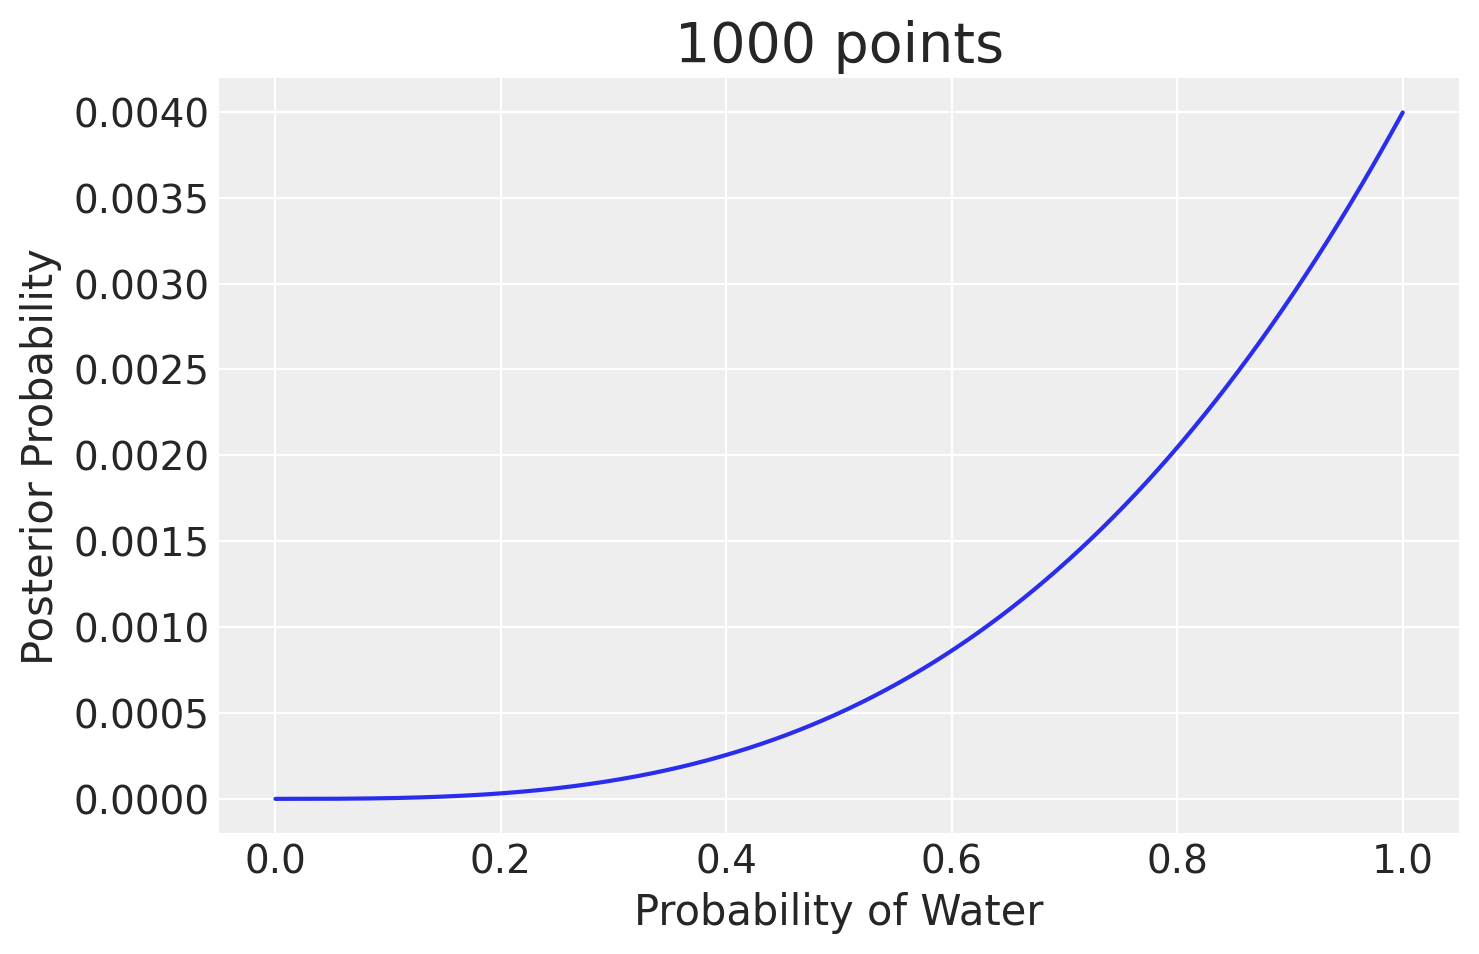

In [15]:
# define gird size
N = 1000
# define grid
p_grid = np.linspace(0, 1, N)
# define prior
prob_p = np.ones(N)
# compute likelihood at each value in grid
prob_data = binom.pmf(3, 3, p_grid)
# compute product of likelihood and prior
posterior = prob_data*prob_p
# standardize the posterior, so it sums to 1
posterior = posterior/sum(posterior)

# plot figure
fig = plt.figure(figsize=(8, 5))
plt.plot(p_grid, posterior, '-')
plt.xlabel('Probability of Water', fontsize=15)
plt.ylabel('Posterior Probability', fontsize=15)
plt.title('{} points'.format(N), fontsize=20)
plt.show()

### Code 3.12

In [16]:
# draw samples
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)
np.percentile(samples, [25, 75])

array([0.71471471, 0.92892893])

### Code 3.13

In [17]:
np.percentile(samples, [50, 100])

array([0.84084084, 1.        ])

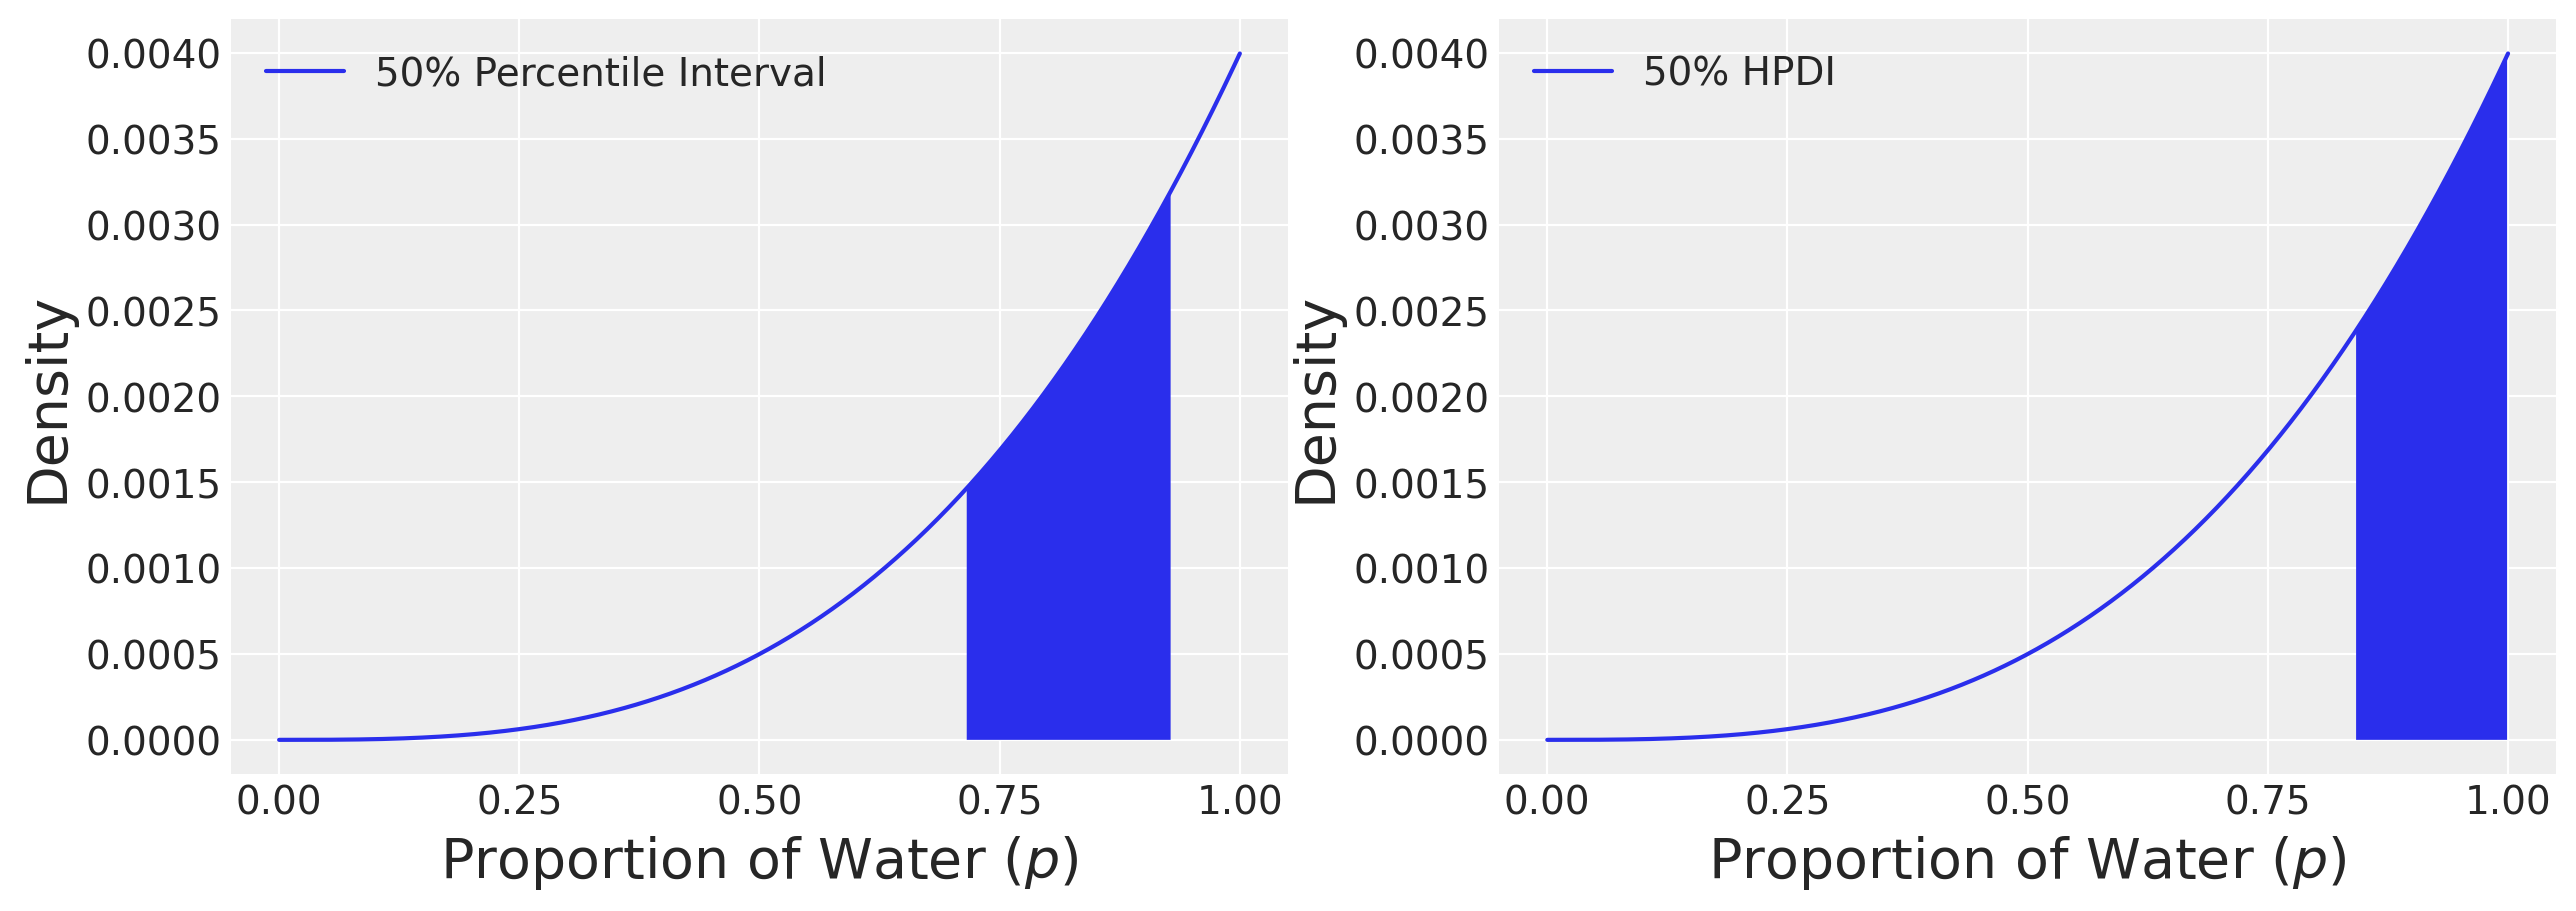

In [18]:
# plotting out intervals of defined boundaries: 
plt.figure(figsize=(15, 5)) 

# plot p > 0.25 & p < 0.75
perc_range = np.percentile(samples, [25, 75])
plt.subplot(1, 2, 1)
plt.plot(p_grid, posterior, label = "50% Percentile Interval")
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where = (p_grid > perc_range[0])&(p_grid < perc_range[1]))
plt.legend(loc=0)

# plot p > 0.5 & p < 1.00
perc_range = np.percentile(samples, [50, 100])
plt.subplot(1, 2, 2)
plt.plot(p_grid, posterior, label = "50% HPDI")
plt.xlabel('Proportion of Water ($p$)', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks([0, 0.25, 0.50, 0.75, 1.00])
plt.fill_between(p_grid, posterior, where = (p_grid > perc_range[0])&(p_grid < perc_range[1]))
plt.legend(loc=0)
plt.show()

### Code 3.14

In [19]:
p_grid[posterior == max(posterior)]

array([1.])

### Code 3.15

In [20]:
stats.mode(samples)[0]

array([0.98698699])

### Code 3.16

In [21]:
np.mean(samples), np.median(samples)

(0.8013351351351352, 0.8408408408408409)

### Code 3.17

In [22]:
sum(posterior*abs(0.5-p_grid))

0.3128751874998123

### Code 3.18

In [23]:
loss = [sum(posterior*abs(p-p_grid)) for p in p_grid]
print(loss)

[0.8004001333332006, 0.7993991323321995, 0.7983981313312059, 0.7973971303302778, 0.7963961293295639, 0.7953951283293664, 0.7943941273301715, 0.793393126332708, 0.792392125337998, 0.7913911243473964, 0.790390123362644, 0.7893891223859156, 0.788388121419868, 0.787387120467685, 0.786386119533131, 0.7853851186205955, 0.7843841177351408, 0.7833831168825531, 0.782382116069386, 0.7813811153030167, 0.7803801145916831, 0.7793791139445431, 0.7783781133717134, 0.7773771128843241, 0.7763761124945624, 0.775375112215726, 0.7743741120622654, 0.7733731120498349, 0.7723721121953415, 0.7713711125169926, 0.770370113034342, 0.769369113768341, 0.7683681147413844, 0.7673671159773594, 0.7663661175016948, 0.7653651193414078, 0.7643641215251517, 0.7633631240832648, 0.7623621270478209, 0.7613611304526717, 0.7603601343335022, 0.7593591387278708, 0.7583581436752646, 0.7573571492171456, 0.7563561553969932, 0.7553551622603617, 0.7543541698549215, 0.7533531782305108, 0.7523521874391798, 0.7513511975352446, 0.7503502

### Code 3.19

In [24]:
p_grid[loss == min(loss)]

array([0.84084084])

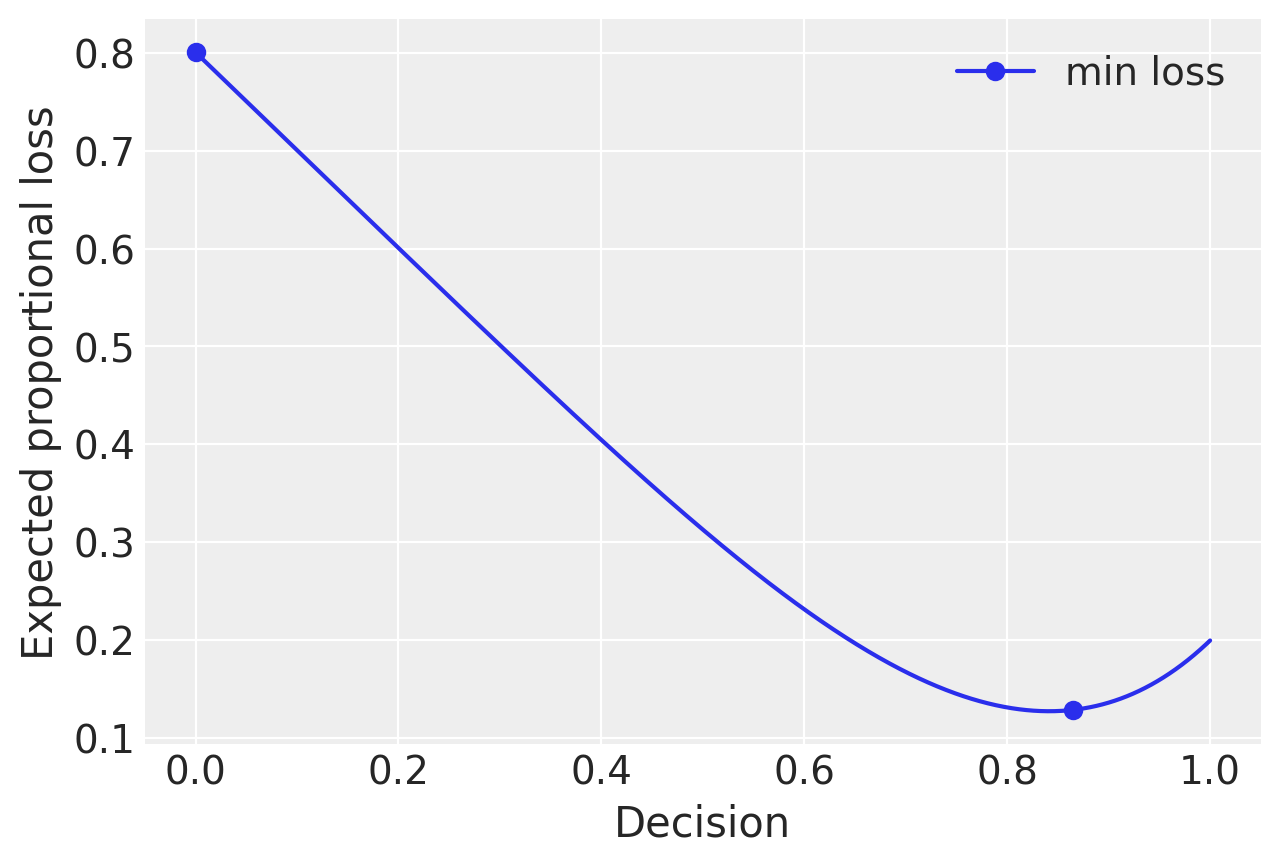

In [25]:
plt.plot(p_grid, loss, markevery=p_grid[loss == min(loss)][0], marker = "o", label = "min loss")
plt.xlabel('Decision', fontsize=15)
plt.ylabel('Expected proportional loss', fontsize=15)
plt.legend(loc=0)
plt.show()

### Code 3.20

In [26]:
stats.binom.pmf([0, 1, 2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

### Code 3.21

In [27]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

### Code 3.22

In [28]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 1, 1, 0, 2, 1, 1, 1, 2, 1])

### Code 3.23

In [29]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.09027, 0.41877, 0.49096]

### Code 3.24

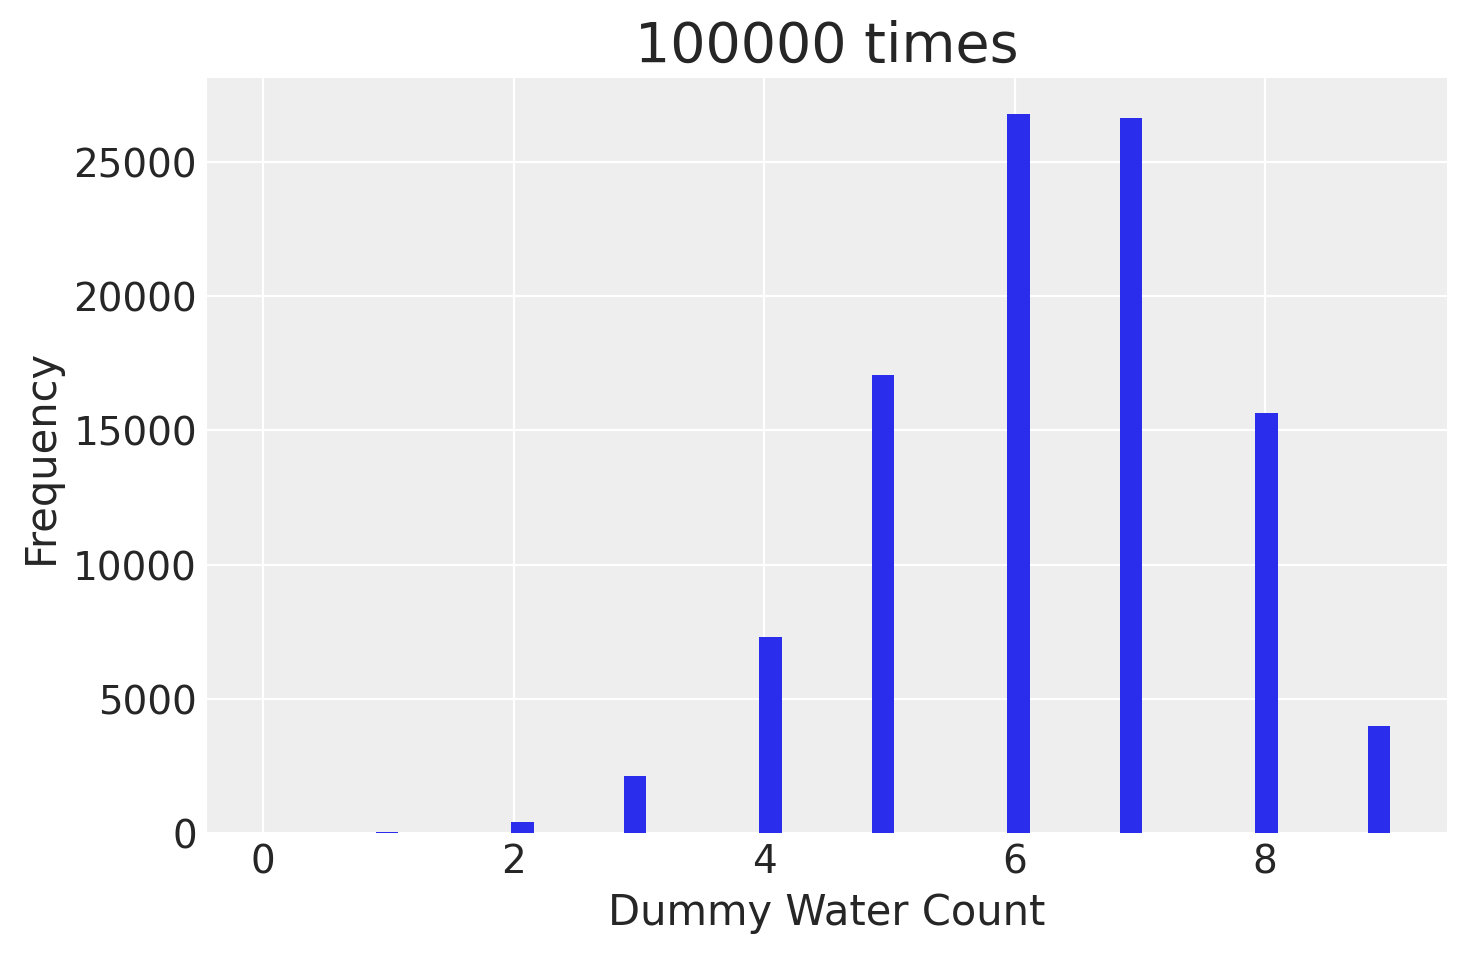

In [30]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))

# plot figure
fig = plt.figure(figsize=(8, 5))
plt.hist(dummy_w, bins=50)
plt.xlabel('Dummy Water Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('{} times'.format(int(1e5)), fontsize=20)
plt.show()

### Code 3.25

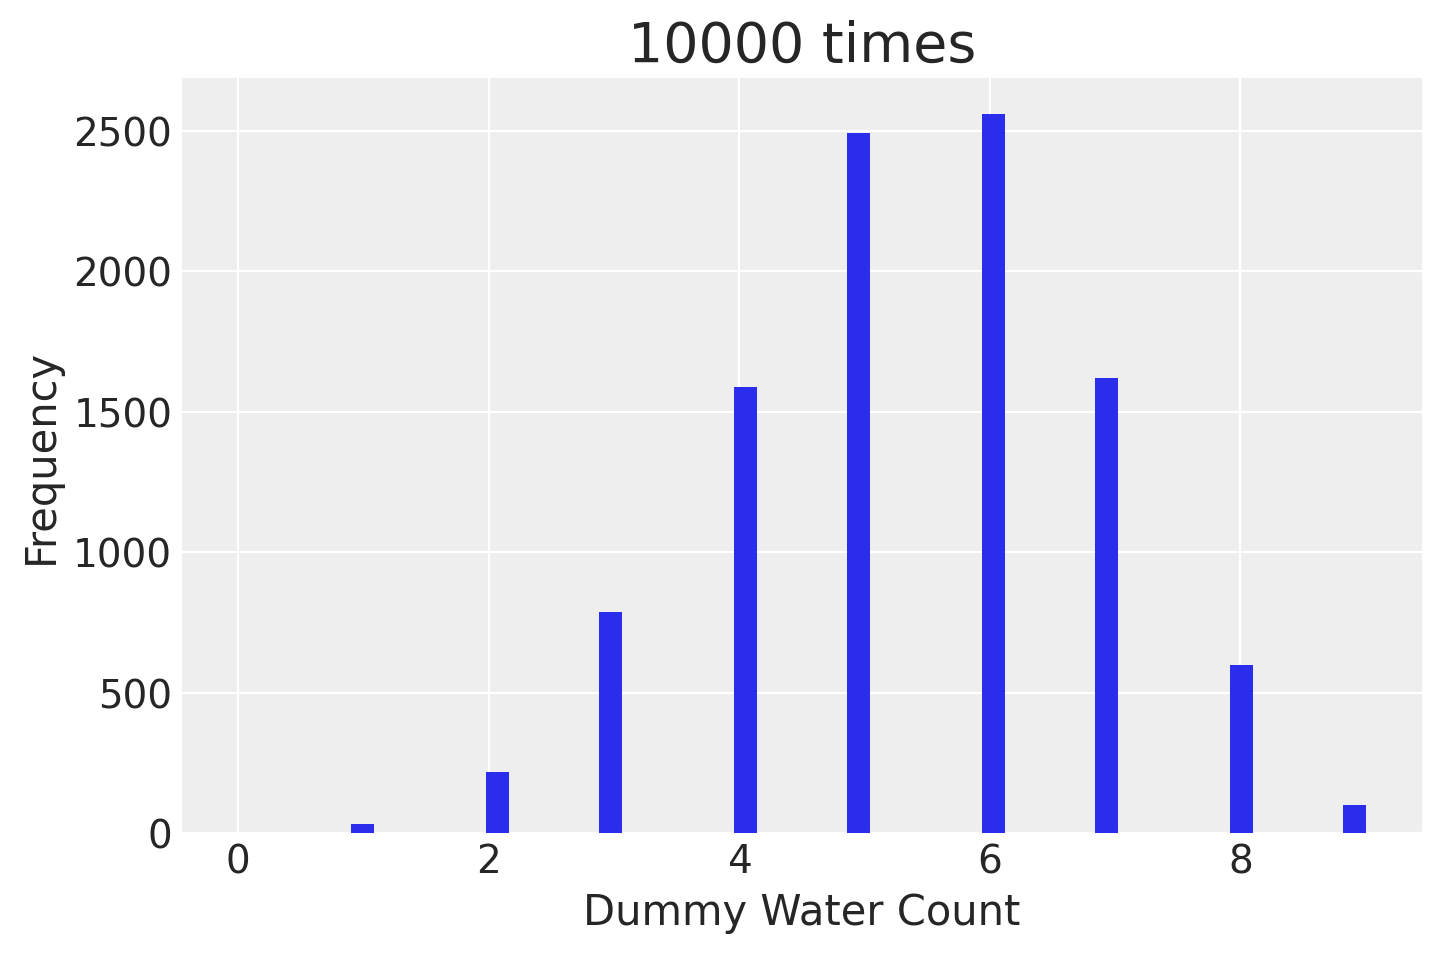

In [31]:
dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

# plot figure
fig = plt.figure(figsize=(8, 5))
plt.hist(dummy_w, bins=50)
plt.xlabel('Dummy Water Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('{} times'.format(int(1e4)), fontsize=20)
plt.show()

### Code 3.26

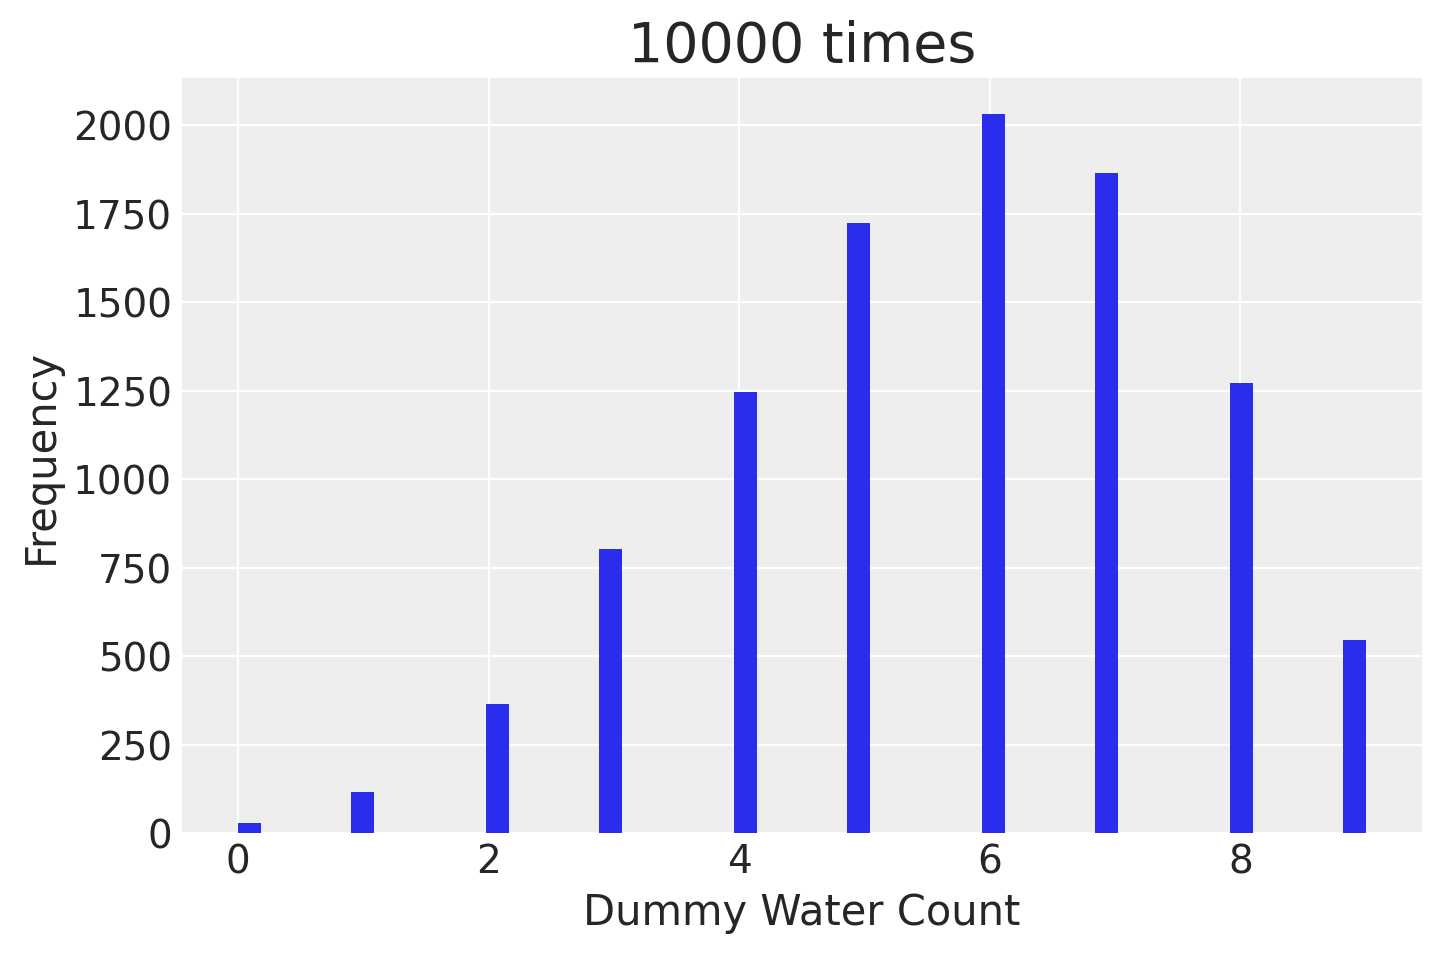

In [32]:
# define gird size
N = 1000
# define grid
p_grid = np.linspace(0, 1, N)
# define prior
prob_p = np.ones(N)
# compute likelihood at each value in grid
prob_data = binom.pmf(6, 9, p_grid)
# compute product of likelihood and prior
posterior = prob_data*prob_p
# standardize the posterior, so it sums to 1
posterior = posterior/sum(posterior)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

dummy_w = stats.binom.rvs(n=9, p=samples, size=int(1e4))

# plot figure
fig = plt.figure(figsize=(8, 5))
plt.hist(dummy_w, bins=50)
plt.xlabel('Dummy Water Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('{} times'.format(int(1e4)), fontsize=20)
plt.show()

### Reference

[pymc-devs: Chp03](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_03.ipynb)